Looking for C:\Users\User\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\User\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 1s 1s/step


True

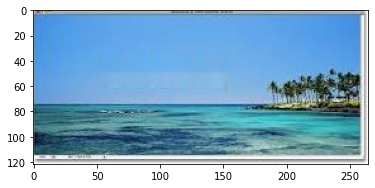

In [1]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
def inpaint_text(img_path, pipeline):
    # read the image 
    img = keras_ocr.tools.read(img_path) 
    
     
    prediction_groups = pipeline.recognize([img])
    

    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
    
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        inpainted_img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(inpainted_img)
pipeline = keras_ocr.pipeline.Pipeline()

img_text_removed = inpaint_text('sea.jfif', pipeline)

plt.imshow(img_text_removed)

cv2.imwrite('text_removed_image.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))